In [104]:
import numpy as np
import pandas as pd  # type: ignore
import matplotlib.pyplot as plt # type: ignore
import pymc as pm   # type: ignore
import arviz as az   # type: ignore

In [24]:
 ### Exercise 1 (max 2 points)
#
# The file [dogs.csv](./dogs.csv) (Jarkoff Hugo, Lorre Guillaume, & Humbert Eric. (2023). Dog Health Vitals Dataset [Data set]. Zenodo. https://doi.org/10.5281/zenodo.8020390) is a collection of recordings and vital statistics related to the health of dogs. It includes data captured during various recording sessions, providing insights into the physiological characteristics of the dogs.
#
#     - duration: Duration of the recording session (in seconds).
#     - pet_id: Unique identifier for each dog.
#     - breeds: Main breed of the dog.
#     - weight: Weight of the dog at the time of measurement (in kg).
#     - age: Age of the dog at the time of measurement (in years).
#     - ecg_pulses: Array of floats separated by commas, each representing the timestamp (in seconds from the beginning of the signal) of an identified heart pulse on the recorded ECG signal.
#
# Load the data in a Pandas dataframe using the first column as the index.

data= pd.read_csv("dogs.csv", index_col=0)
data

#DataFrame.drop(labels=None, *, axis=0, index=None, columns=None, level=None, inplace=False, errors='raise')

,duration,pet_id,breeds,weight,age,ecg_pulses
0,300.12,14,boxer,34.0,4.5,"0.98, 2.51, 2.82, 3.39, 4.04, 4.65, 5.57, 6.52..."
1,300.08,14,boxer,34.0,4.5,"0.64, 1.28, 2.06, 2.37, 2.79, 3.7, 4.41, 5.3, ..."
2,300.08,14,boxer,34.0,4.5,"0.93, 1.14, 1.94, 2.95, 3.82, 4.44, 5.02, 6.3,..."
3,300.14,14,boxer,34.0,4.5,"0.83, 1.84, 2.62, 3.33, 5.25, 6.9, 7.77, 8.43,..."
4,300.12,14,boxer,34.0,4.5,"1.18, 2.33, 3.75, 5.42, 6.6, 7.76, 8.84, 9.94,..."
...,...,...,...,...,...,...
1118,72.92,34,golden_retriever,22.0,1.1,"1.22, 1.71, 2.3, 3.62, 4.25, 4.72, 5.28, 6.52,..."
1119,224.60,38,australian_shepherd,23.0,2.1,"0.98, 2.29, 3.26, 3.98, 5.02, 5.67, 6.5, 7.28,..."
1120,220.42,38,australian_shepherd,23.0,2.1,"0.7, 1.38, 2.78, 3.6, 4.76, 5.72, 6.49, 7.66, ..."
1121,21.98,36,whippet,11.7,2.5,"1.01, 2.17, 3.19, 4.22, 4.96, 5.72, 6.25, 6.71..."


In [91]:
### Exercise 2 (max 3 points)
# Check (i.e., write an assertion) that each recording referring to a specific dog (identified by its `pet_id`) has exactlt the same `breeds`,`weight`,`age`.

def assert_columns_consistent(df: pd.DataFrame, group_col: str, cols_to_check: list):
    grouped = data.groupby(group_col)
    for name, group in grouped:
        for col in cols_to_check:
            unique_values = group[col].unique()
            assert len(unique_values) == 1, f"Inconsistent values for {group_col} {name} in column {col}: {unique_values}"

if __name__ == "__main__":
    import doctest
    doctest.testmod()

assert_columns_consistent(data, 'pet_id', ['breeds', 'weight', "age"])

In [128]:
 ### Exercise 3 
# Consider the dog with `pet_id` $= 22$: make a scatter plot of the first 15 `ecg_pulse`s values for all its ecg recordings (30 in total). 
# Use different Y values and colors for each line of the scatter points, such that all the lines are in the same plot but they do not overlap and are easier to compare.


dalmatien = data[data['pet_id'] == 22] 
dalmatien['Index'] = range(0, len(dalmatien) )

subset = dalmatien[['pet_id', 'ecg_pulses']]
subset


C:\Users\bulga\AppData\Local\Temp\ipykernel_13384\4072514014.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dalmatien['Index'] = range(0, len(dalmatien) )


,pet_id,ecg_pulses
192,22,"0.77, 1.18, 1.96, 2.76, 3.37, 4.0, 5.01, 5.88,..."
193,22,"0.74, 1.29, 1.86, 2.51, 3.52, 4.12, 4.68, 5.27..."
195,22,"1.47, 2.52, 3.16, 3.73, 4.31, 5.05, 5.79, 6.75..."
197,22,"1.02, 1.53, 2.14, 3.35, 4.15, 4.72, 5.73, 6.29..."
199,22,"0.84, 1.37, 1.88, 2.53, 3.82, 4.69, 5.28, 5.81..."
200,22,"0.9, 1.58, 2.26, 3.35, 3.98, 4.51, 5.05, 5.65,..."
201,22,"1.12, 1.82, 2.36, 2.92, 3.61, 4.61, 5.22, 5.85..."
203,22,"0.74, 1.42, 1.98, 2.68, 3.59, 4.4, 4.99, 5.54,..."
204,22,"0.87, 1.41, 2.02, 3.24, 3.92, 4.47, 5.14, 5.95..."
205,22,"0.65, 1.49, 2.09, 2.95, 3.69, 4.29, 4.87, 5.69..."


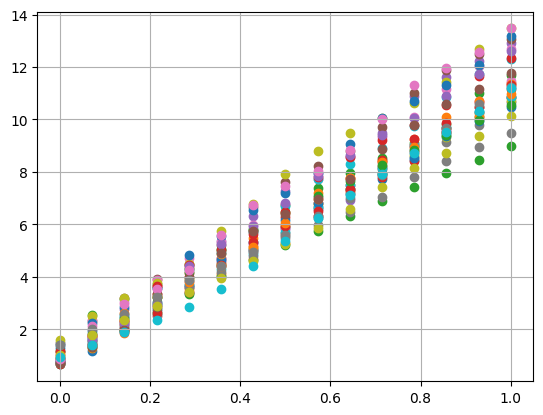

In [170]:
'''
X= np.linspace(0, 10, len(dalmatien.iloc[0,5]))
Y= dalmatien.loc[192,"ecg_pulses"]
plt.hist(Y )
#print (len(X), len(dalmatien.iloc[0, 5]))
'''
for i in range (30):
    X= np.linspace(0, 1, 15)
    y= subset.iloc[i, 1] #RIGA COLONNA - aldilà dell'indice lo zero è il primo
    Y = [float(num) for num in y.split(',')]

    plt.scatter(X, Y[0:15], label= i)
    #plt.legend()
    plt.grid (True)


In [169]:
# ### Exercise 4 (max 7 points)
# Define a function `deltas` that takes a list of sorted (increasingly) float values and a total duration and returns a list of deltas between the values. 
# The first delta is always equal to the first value of the list and the last delta is difference between the total duration (greater than all the values) and the last values. 
# For example, if the list of values is `[0.98, 2.51, 2.82, 3.39]` and the total duration is 4, the result is `[0.98, 1.53, 0.31, 0.57, .61]`.

# To get the full marks, you should declare correctly the type hints and add a test within a doctest string.

def deltas(values: list[float], T: float) -> list[float]:

        deltas_list = [values[0]]  # Il primo delta è uguale al primo valore della lista.
        for i in range(1, len(values)):
            deltas_list.append(values[i] - values[i - 1])
        deltas_list.append(T - values[-1])  # L'ultimo delta è la differenza tra la durata totale e l'ultimo valore.

        return deltas_list

if __name__ == "__main__":
    import doctest
    doctest.testmod()

deltas([0.4, 0.99, 1.2, 3, 5.55], 14)

[0.4, 0.59, 0.20999999999999996, 1.8, 2.55, 8.45]

In [204]:
## Exercise 5 (max 4 points)
#
# Add a column `mean_ecg_delta` to the data with the average values of the deltas of the `ecg_pulses` as computed by the function defined in Exercise 4 
# (by using the `duration` of the recordings). When there is no `ecg_pulse` recording (`NaN`), the value `mean_ecg_delta` should be `NaN`.  
def calculate_mean_ecg_delta(row):
    if pd.isna(row['ecg_pulses']):
         return "Nan"
    #if len(row['ecg_pulses']) == 0:
     #   return np.nan
    deltas_list = deltas(row['ecg_pulses'], row['duration'])
    return np.mean(deltas_list)

def convert_to_float_list(value):
    if isinstance(value, str):
        return [float(x) for x in value.strip('[]').split(',')]
    return value

# Applicare la conversione al DataFrame

# Aggiungere la colonna 'mean_ecg_delta' calcolando la media dei delta
data['ecg_pulses'] = data['ecg_pulses'].apply(convert_to_float_list)

data['mean_ecg_delta'] = data.apply(lambda row: calculate_mean_ecg_delta(row), axis=1)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [193]:
filtered_data = data[data['pet_id'] == 32]
filtered_data
# Calculate deltas for ecg_pulses of the specific pet_id
deltas_list = deltas(filtered_data.iloc[4]['ecg_pulses'], filtered_data.iloc[0]['duration'])

# Plotting

for i in range(len(filtered_data)):
    plt.figure(figsize=(10, 6))
    plt.plot(np.linspace(0, filtered_data.iloc[i]['duration'], len(deltas_list)), deltas_list, marker='o', linestyle='-', color='b')
    plt.title('Deltas for ECG pulses of pet_id = 32')
    plt.xlabel('Time (seconds)')
    plt.ylabel('Delta values')
    plt.grid(True)


In [191]:
max_mean_ecg_delta = data.groupby('pet_id')['mean_ecg_delta'].max()

KeyError: 'Column not found: mean_ecg_delta'